# Computational physics - Problem Set 1

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import typing

def estimate_pi(p, x) -> typing.Tuple[typing.List[float], typing.List[float], typing.List[float], typing.List[float]]:
  points = np.random.uniform(low=-1.0, high=1.0, size=(2, p, x, ))
  radius = (points**2).sum(axis=0)
  inside_circle = radius[(radius <= 1)]

  pi_mean = 4 * (radius <= 1).sum(axis=0) / p
  pi_std = np.sqrt((np.sum((4 * (radius <= 1) - pi_mean)**2, axis=0)) / p)

  return [pi_mean, pi_std, radius, inside_circle]


Estimate PI Mean=3.168. Standard Deviation=1.624


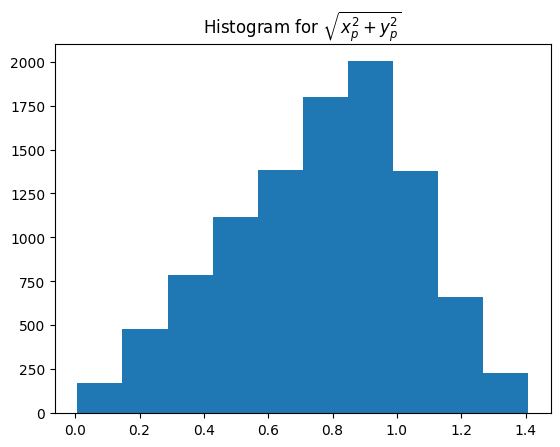

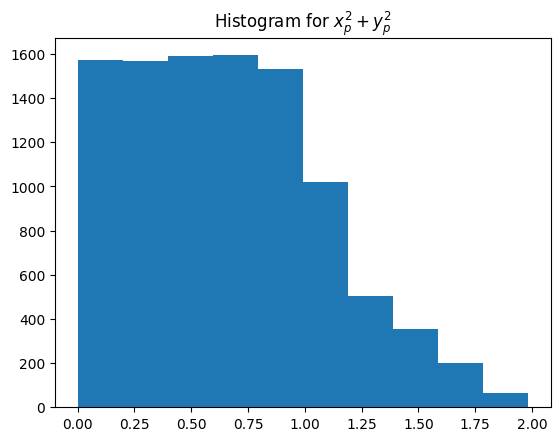

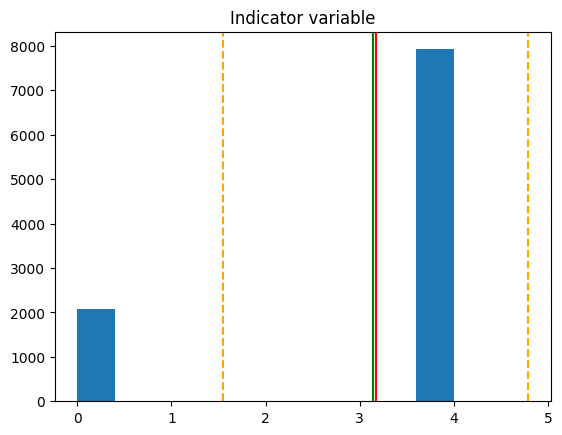

In [225]:
pi_mean, pi_std, radius, inside = estimate_pi(10000, 1)
print(f'Estimate PI Mean={pi_mean[0]:.3f}. Standard Deviation={pi_std[0]:.3f}')

plt.hist(np.sqrt(radius))
plt.title('Histogram for $\\sqrt{x_p^2 + y_p^2}$')
plt.show()

plt.hist(radius)
plt.title('Histogram for $x_p^2 + y_p^2$')
plt.show()

# plt.hist(inside_circle)
# plt.axvline(x=np.pi, color='green')
# plt.axvline(x=inside_circle.mean(), color='red')
# plt.title('Indicator variable')
# plt.show()

plt.hist(4 * (radius <= 1))

mean = (4 * (radius <= 1)).mean()
std = (4 * (radius <= 1)).std()
plt.axvline(x=mean, color='red')
plt.axvline(x=mean - std, linestyle='dashed', color='orange')
plt.axvline(x=mean + std, linestyle='dashed', color='orange')
plt.axvline(x=np.pi, color='green')

plt.title('Indicator variable')
plt.show()

## 1.2

Estimate PI Mean=3.141. Standard Deviation=0.164


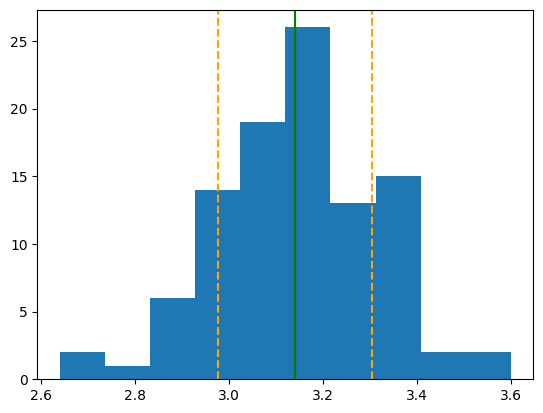

In [226]:
pi_means, pi_stds, radius, inside = estimate_pi(100, 100)

mean = pi_means.sum() / 100
std = np.sqrt(np.sum((pi_means - mean)**2) / 99)
print(f'Estimate PI Mean={mean:.3f}. Standard Deviation={std:.3f}')

plt.hist(pi_means)
plt.axvline(x=mean, color='red')
plt.axvline(x=mean - std, linestyle='dashed', color='orange')
plt.axvline(x=mean + std, linestyle='dashed', color='orange')
plt.axvline(x=np.pi, color='green')


Estimate PI Mean=3.125. Standard Deviation=0.523


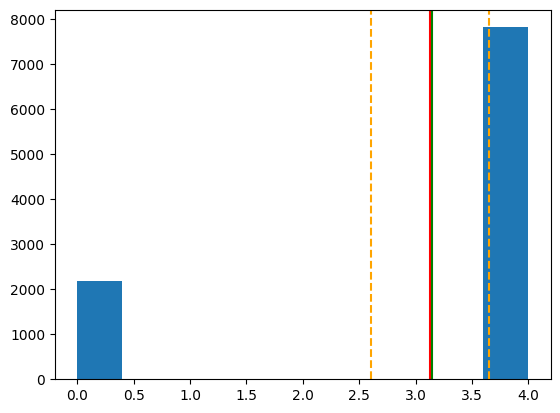

In [227]:
pi_means, pi_stds, radius, inside = estimate_pi(1, 10000)

mean = pi_means.sum() / 10000
std = np.sqrt(np.sum((pi_means - mean)**2) / 99999)
print(f'Estimate PI Mean={mean:.3f}. Standard Deviation={std:.3f}')

plt.hist(pi_means)
plt.axvline(x=mean, color='red')
plt.axvline(x=mean - std, linestyle='dashed', color='orange')
plt.axvline(x=mean + std, linestyle='dashed', color='orange')
plt.axvline(x=np.pi, color='green')


P=10, X=10: Estimate PI Mean=3.1200. Standard Deviation=0.3676


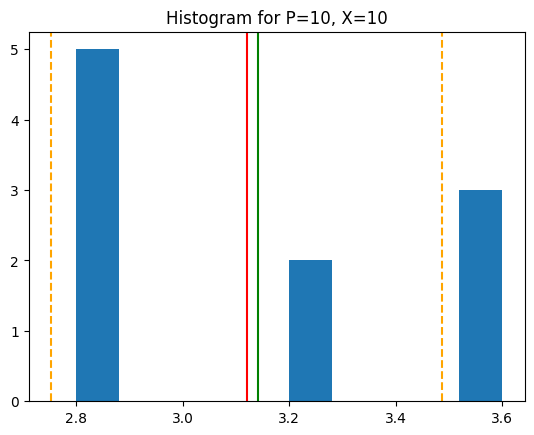

P=10, X=100: Estimate PI Mean=3.1960. Standard Deviation=0.5288


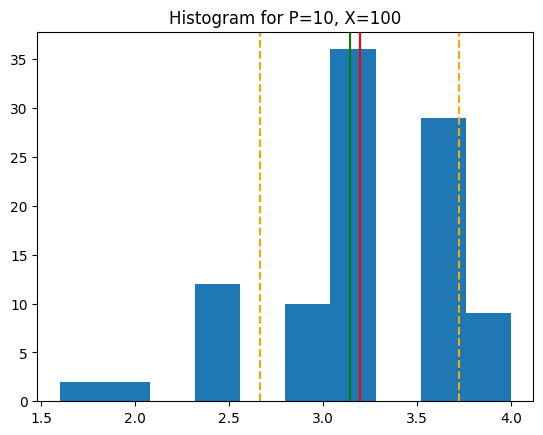

P=10, X=1000: Estimate PI Mean=3.1544. Standard Deviation=0.5232


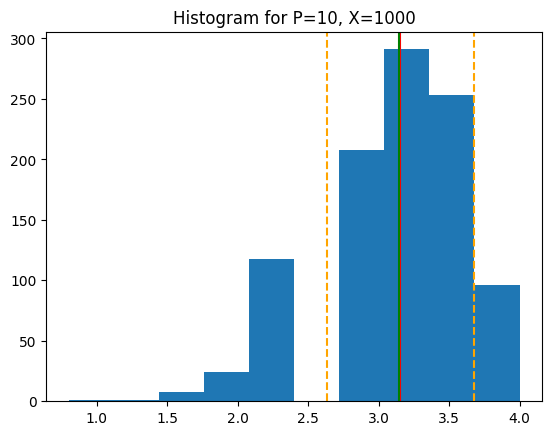

P=10, X=10000: Estimate PI Mean=3.1363. Standard Deviation=0.5182


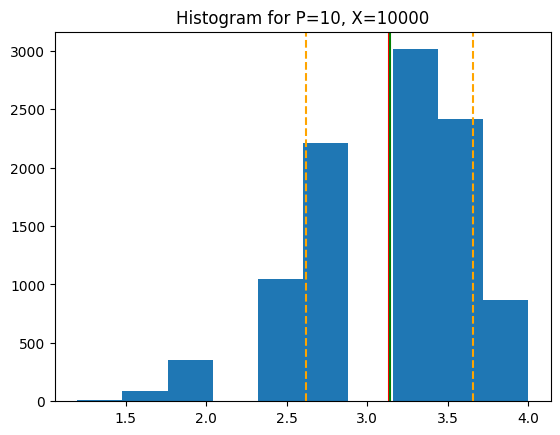

P=100, X=10: Estimate PI Mean=3.1360. Standard Deviation=0.2193


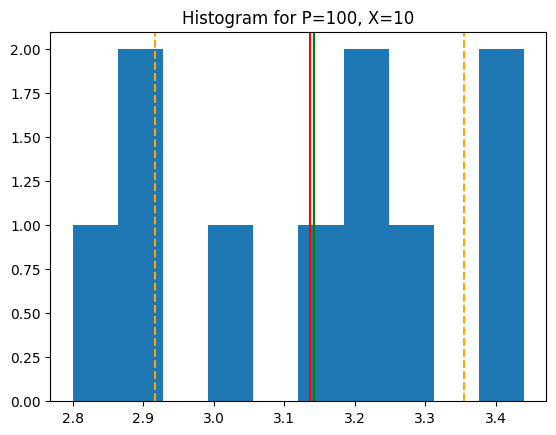

P=100, X=100: Estimate PI Mean=3.1024. Standard Deviation=0.1516


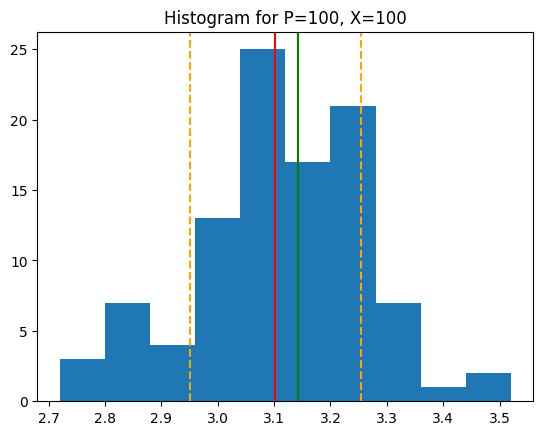

P=100, X=1000: Estimate PI Mean=3.1363. Standard Deviation=0.1661


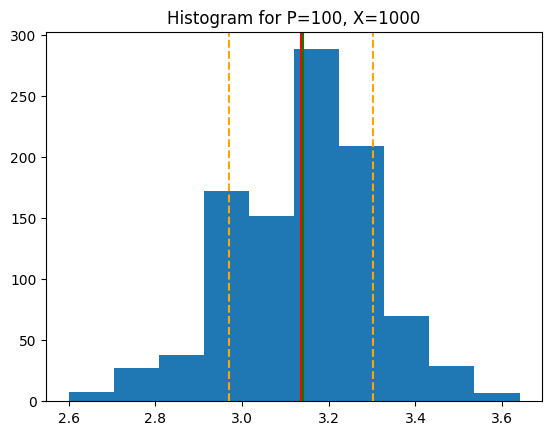

P=100, X=10000: Estimate PI Mean=3.1441. Standard Deviation=0.1667


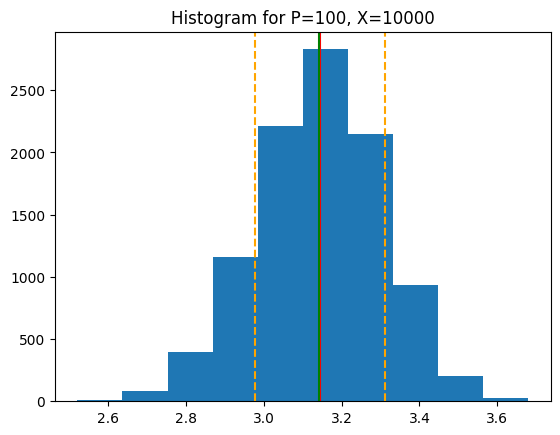

P=1000, X=10: Estimate PI Mean=3.1372. Standard Deviation=0.0383


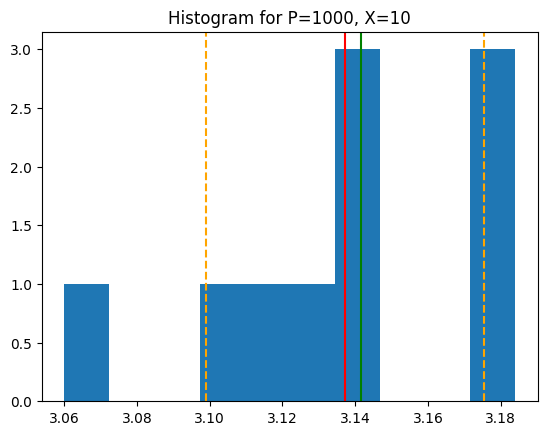

P=1000, X=100: Estimate PI Mean=3.1377. Standard Deviation=0.0575


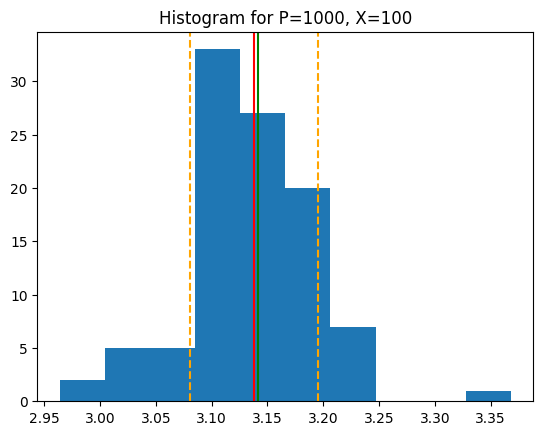

P=1000, X=1000: Estimate PI Mean=3.1413. Standard Deviation=0.0533


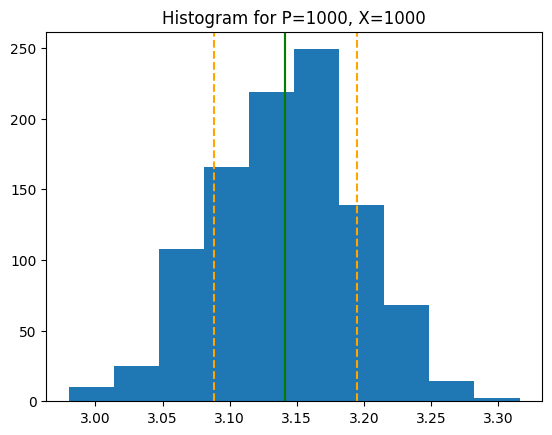

P=1000, X=10000: Estimate PI Mean=3.1418. Standard Deviation=0.0523


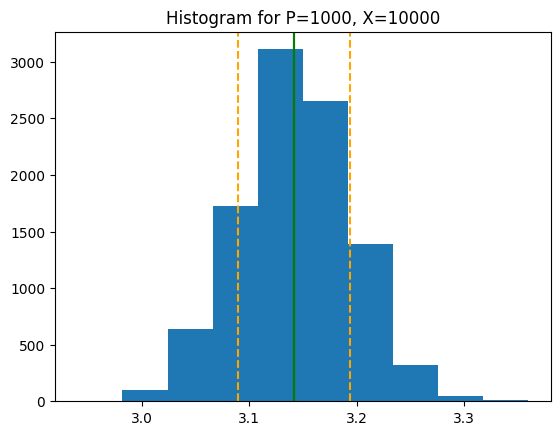

P=10000, X=10: Estimate PI Mean=3.1491. Standard Deviation=0.0126


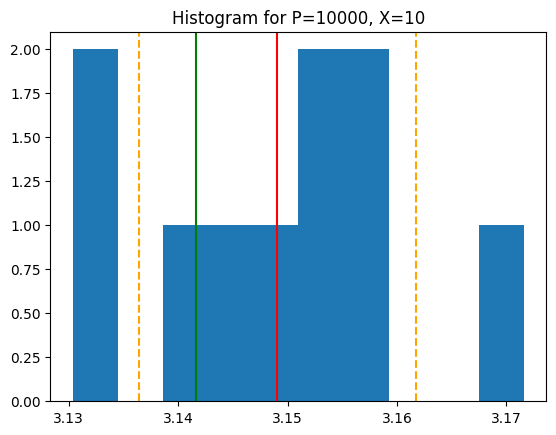

P=10000, X=100: Estimate PI Mean=3.1405. Standard Deviation=0.0164


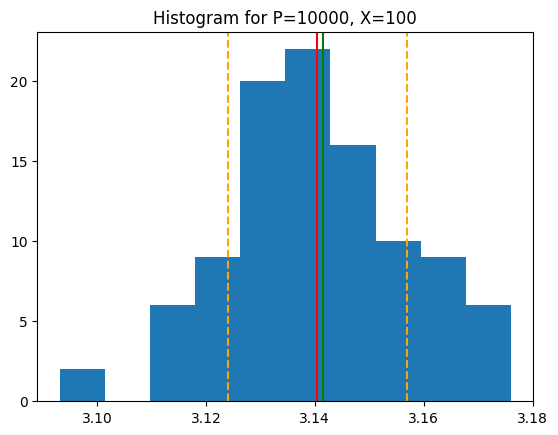

P=10000, X=1000: Estimate PI Mean=3.1417. Standard Deviation=0.0163


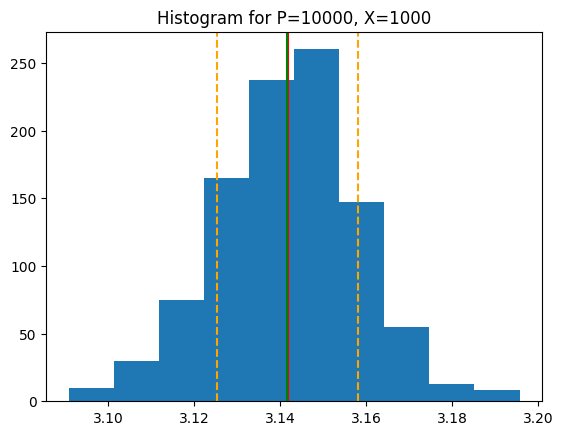

P=10000, X=10000: Estimate PI Mean=3.1416. Standard Deviation=0.0165


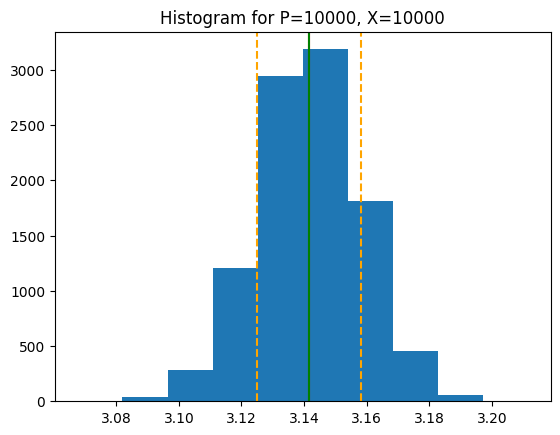

In [228]:
fixedp_uncertainty = dict()
fixedx_uncertainty = dict()

for p in [10, 100, 1000, 10000]:
    for x in [10, 100, 1000, 10000]:
        pi_means, pi_stds, radius, inside = estimate_pi(p, x)

        mean = pi_means.sum() / x
        std = np.sqrt(np.sum((pi_means - mean)**2) / (x-1))
        print(f'P={p}, X={x}: Estimate PI Mean={mean:.4f}. Standard Deviation={std:.4f}')

        plt.hist(pi_means)
        plt.title(f'Histogram for P={p}, X={x}')
        plt.axvline(x=mean, color='red')
        plt.axvline(x=mean - std, linestyle='dashed', color='orange')
        plt.axvline(x=mean + std, linestyle='dashed', color='orange')
        plt.axvline(x=np.pi, color='green')
        plt.show()

        if p in fixedp_uncertainty:
            fixedp_uncertainty[p].append((x, std))
        else:
            fixedp_uncertainty[p] = [(x, std)]

        if x in fixedx_uncertainty:
            fixedx_uncertainty[x].append((p, std))
        else:
            fixedx_uncertainty[x] = [(p, std)]


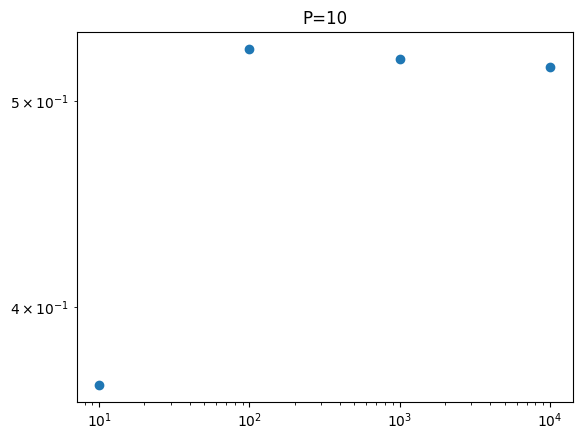

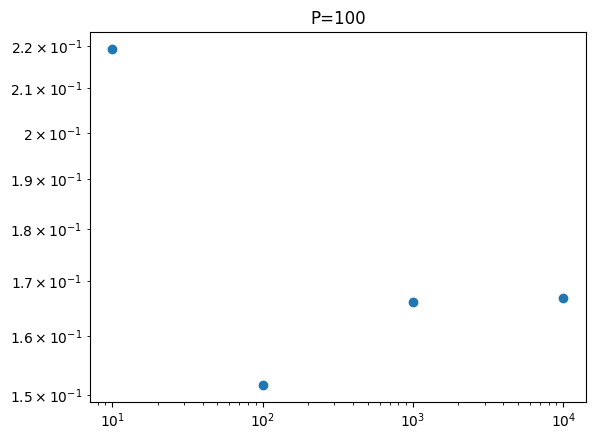

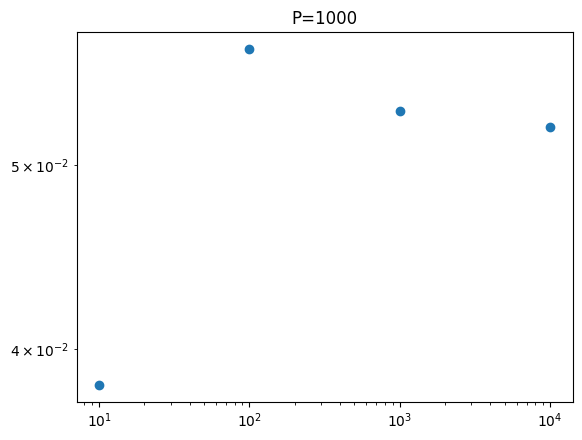

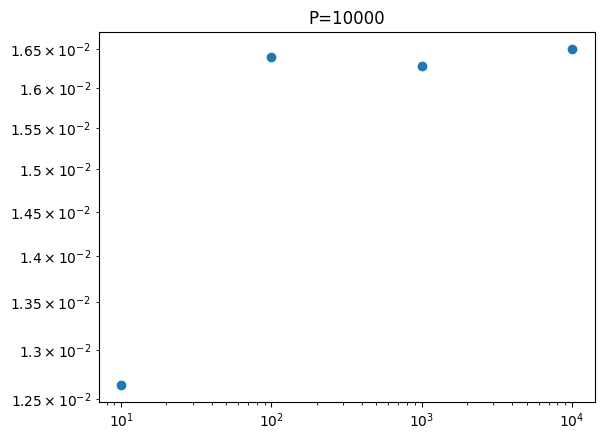

In [229]:
for p in fixedp_uncertainty:
    xarr = [item[0] for item in fixedp_uncertainty[p]]
    yarr = [item[1] for item in fixedp_uncertainty[p]]

    plt.loglog(xarr, yarr, 'o')
    plt.title(f'P={p}')
    plt.show()

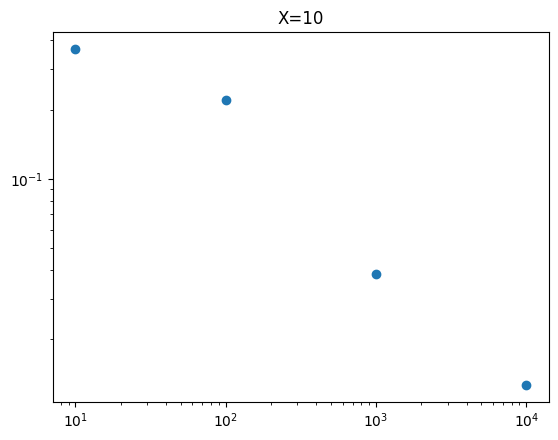

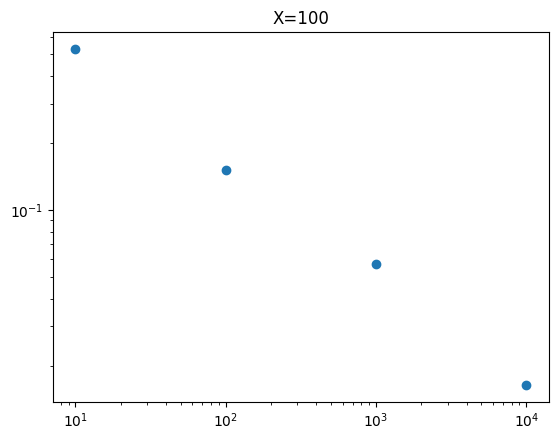

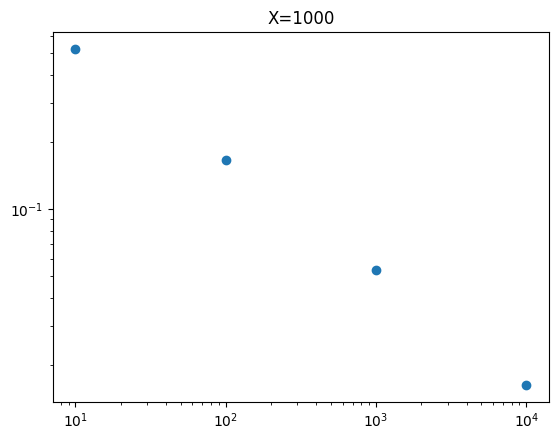

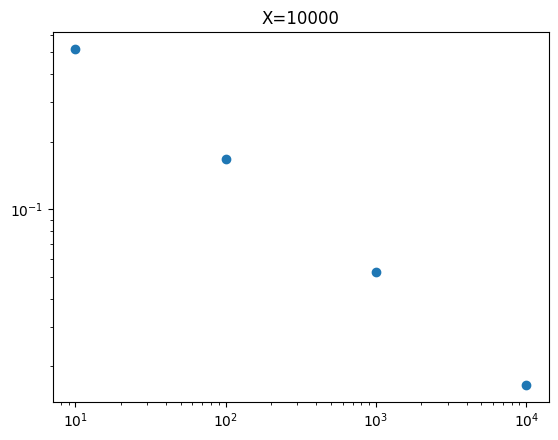

In [230]:
for x in fixedx_uncertainty:
    xarr = [item[0] for item in fixedx_uncertainty[x]]
    yarr = [item[1] for item in fixedx_uncertainty[x]]

    plt.loglog(xarr, yarr, 'o')
    plt.title(f'X={x}')
    plt.show()